1. Usei o site SQLite Online (https://sqliteonline.com/) para visualiazar as tabela e fazer algumas analises iniciais

    Exemplos das analises:

    userID, channel sem indenfiticação = NULL
    
2. converter aquivo amigoedu_bi_challenge.sqlite em aquivos csv (Table_A.csv e Table_B.csv)

---



In [ ]:
#imports

import pandas as pd

#grafico
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#lendo arquivo

tabelaA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AmigoEdu/table_A.csv")
tabelaA.head()

,convId,userId,revenue,createdAt
0,881152bb20f9b73daafb99d77714f38ac702629c,5094298f068196c5349d43847de5afc9125cf989,47.00000,06-03-2017
1,faf5c1181ea84a32237dff45ca201d2c28f19d7b,NaN,98.00004,02-03-2017
2,b0e58a88459ece1b585ca22c93e633dc56273b83,NaN,180.35300,02-03-2017
3,f0e6b7de22332c7b18c024e550bb1d860130cdf1,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,23-03-2017
4,966568c7c859480c79b212520d20a51e735fd735,NaN,197.47008,03-03-2017


In [ ]:
#tabela B

tabelaB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AmigoEdu/table_B.csv")
tabelaB.head()

,index,convId,channel,contribution
0,0,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000
1,1,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250
2,2,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839
3,3,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911
4,4,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000


In [ ]:
#realizando o join das duas tabelas

dfData = tabelaB.join(tabelaA.set_index('convId'), on='convId')
dfData.head()

,index,convId,channel,contribution,userId,revenue,createdAt
0,0,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,5094298f068196c5349d43847de5afc9125cf989,47.00000,06-03-2017
1,1,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250,NaN,98.00004,02-03-2017
2,2,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839,NaN,98.00004,02-03-2017
3,3,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911,NaN,98.00004,02-03-2017
4,4,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000,NaN,180.35300,02-03-2017


In [ ]:
#coletando informação para anlise das colunas

dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211060 entries, 0 to 211059
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         211060 non-null  int64  
 1   convId        211060 non-null  object 
 2   channel       211060 non-null  object 
 3   contribution  211060 non-null  float64
 4   userId        204422 non-null  object 
 5   revenue       211060 non-null  float64
 6   createdAt     211060 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ MB


In [ ]:
#quantidade de linhas

len(dfData)

211060

In [ ]:
#converter createdAt em data, pois esta como objtec-string

dfData['Date'] = pd.to_datetime(dfData['createdAt'], infer_datetime_format=True)
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211060 entries, 0 to 211059
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         211060 non-null  int64         
 1   convId        211060 non-null  object        
 2   channel       211060 non-null  object        
 3   contribution  211060 non-null  float64       
 4   userId        204422 non-null  object        
 5   revenue       211060 non-null  float64       
 6   createdAt     211060 non-null  object        
 7   Date          211060 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.9+ MB


In [ ]:
#criando um novo dataframe coluna para impedir informação duplicada 

dfdata = dfData.drop(['index', 'createdAt'], 1)
dfdata.head()

,convId,channel,contribution,userId,revenue,Date
0,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,5094298f068196c5349d43847de5afc9125cf989,47.00000,2017-06-03
1,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250,NaN,98.00004,2017-02-03
2,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839,NaN,98.00004,2017-02-03
3,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911,NaN,98.00004,2017-02-03
4,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000,NaN,180.35300,2017-02-03


In [ ]:
#apagando valores Not a Number

dfdata = dfdata.dropna()
len(dfdata)

204422

In [ ]:
#visualzuando dataframe

dfdata

,convId,channel,contribution,userId,revenue,Date
0,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,5094298f068196c5349d43847de5afc9125cf989,47.00000,2017-06-03
5,f0e6b7de22332c7b18c024e550bb1d860130cdf1,I,0.177042,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23
6,f0e6b7de22332c7b18c024e550bb1d860130cdf1,A,0.573316,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23
7,f0e6b7de22332c7b18c024e550bb1d860130cdf1,B,0.024867,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23
8,f0e6b7de22332c7b18c024e550bb1d860130cdf1,G,0.057023,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23
...,...,...,...,...,...,...
211055,ce7be68946baaf23c23bafffc0b60d63b9392615,C,1.000000,3342d5b210274b01e947cc15531ad53fbe25435b,231.56800,2018-03-26
211056,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45,I,0.400014,b3f02d0768c0ba8334047d106eb759f3e80517ac,119.50400,2018-03-26
211057,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45,A,0.498988,b3f02d0768c0ba8334047d106eb759f3e80517ac,119.50400,2018-03-26
211058,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45,C,0.100998,b3f02d0768c0ba8334047d106eb759f3e80517ac,119.50400,2018-03-26


In [ ]:
#criando novas inforamções/colunas levantamento de dados  para classficação

dfdata['Month'] = dfdata['Date'].apply(lambda time: time.month)
dfdata['Day of Week'] = dfdata['Date'].apply(lambda time: time.dayofweek)
dfdata['year'] = dfdata['Date'].apply(lambda time: time.year)

In [ ]:
#Usando o .map criar um dicionario e nomear o dia da semana em str = domingo, segunda...

dmap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
dfdata['Day of Week'] = dfdata['Day of Week'].map(dmap)
dfdata.head()

,convId,channel,contribution,userId,revenue,Date,Month,Day of Week,year
0,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,5094298f068196c5349d43847de5afc9125cf989,47.00000,2017-06-03,6,Saturday,2017
5,f0e6b7de22332c7b18c024e550bb1d860130cdf1,I,0.177042,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,3,Thursday,2017
6,f0e6b7de22332c7b18c024e550bb1d860130cdf1,A,0.573316,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,3,Thursday,2017
7,f0e6b7de22332c7b18c024e550bb1d860130cdf1,B,0.024867,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,3,Thursday,2017
8,f0e6b7de22332c7b18c024e550bb1d860130cdf1,G,0.057023,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,3,Thursday,2017


In [ ]:
#Usando o .map criar um dicionario e nomear meses 

dmap = {1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 
        7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro' }
dfdata['Month'] = dfdata['Month'].map(dmap)
dfdata.head()

,convId,channel,contribution,userId,revenue,Date,Month,Day of Week,year
0,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,5094298f068196c5349d43847de5afc9125cf989,47.00000,2017-06-03,Junho,Saturday,2017
5,f0e6b7de22332c7b18c024e550bb1d860130cdf1,I,0.177042,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,Março,Thursday,2017
6,f0e6b7de22332c7b18c024e550bb1d860130cdf1,A,0.573316,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,Março,Thursday,2017
7,f0e6b7de22332c7b18c024e550bb1d860130cdf1,B,0.024867,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,Março,Thursday,2017
8,f0e6b7de22332c7b18c024e550bb1d860130cdf1,G,0.057023,433fdf385e33176cf9b0d67ecf383aa928fa261c,201.94104,2017-03-23,Março,Thursday,2017


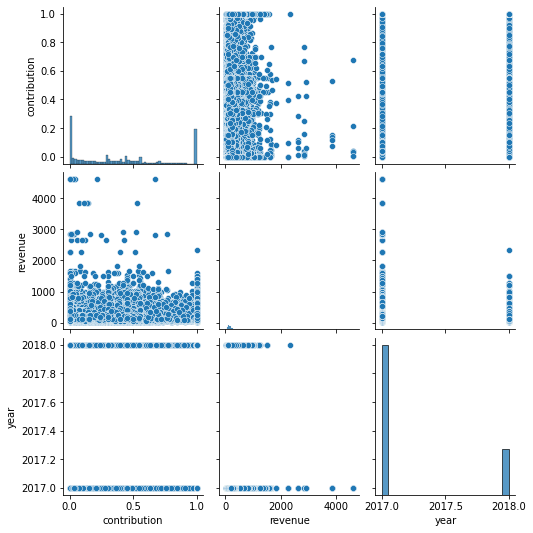

In [ ]:
#Exploração de dados

#grafico
sns.pairplot(dfdata)

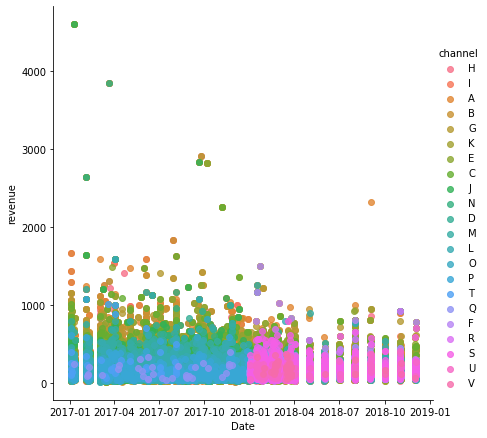

In [ ]:
#Exploração de dados

#analisando e procurando informações
sns.lmplot(data = dfdata, x = 'Date', y = 'revenue', hue = 'channel', height = 6, fit_reg= False)
sns.set_style('whitegrid')

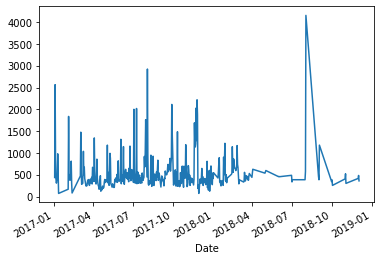

In [ ]:
#Exploração de dados

#analisando e procurando informações
#grafico de todo data frame por data

dfdata.groupby('Date').count()['revenue'].plot()

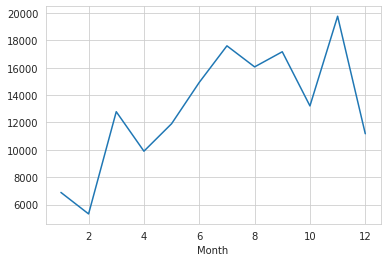

In [ ]:
#Exploração de dados

#analisando e procurando informações

dfdata[dfdata['year'] == 2017].groupby('Month').count()['revenue'].plot()

In [1]:
#Exploração de dados

#analisando e procurando informações
#queda da receita

dfdata[dfdata['year'] == 2018].groupby('Month').count()['revenue'].plot()

NameError: ignored

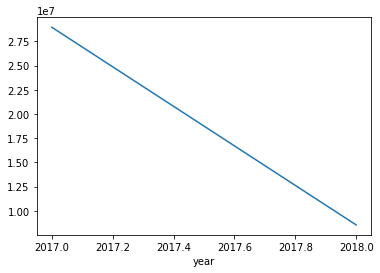

In [ ]:
#Exploração de dados

#analisando e procurando informações
#queda da receita

dfdata.groupby('year').sum()['revenue'].plot()

In [ ]:
#agrupamento de canais ordenado pela receita

dfChannel = dfdata.groupby('channel').sum().sort_values(by='revenue', ascending = False)
dfChannel.head()


,contribution,revenue,Month,year
channel,,,,
A,20812.123971,7.729556e+06,261892,81663898
G,17484.093898,6.581498e+06,234028,72668401
H,10977.484892,5.192739e+06,182384,57984760
I,7488.124175,4.333058e+06,158116,48180008
B,8894.056964,4.115119e+06,144859,44537331


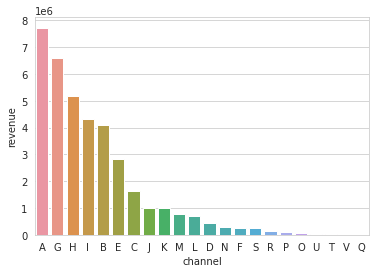

In [ ]:
#Exploração de dados

#analisando e procurando informações
#receita gerada por canal 

sns.barplot(data = dfChannel, x =dfChannel.index, y = 'revenue')

In [ ]:
#resetando o index

dfChannel.reset_index()

,channel,contribution,revenue,Month,year
0,A,20812.123971,7.729556e+06,261892,81663898
1,G,17484.093898,6.581498e+06,234028,72668401
2,H,10977.484892,5.192739e+06,182384,57984760
3,I,7488.124175,4.333058e+06,158116,48180008
4,B,8894.056964,4.115119e+06,144859,44537331
5,E,3811.667582,2.847103e+06,91225,30288682
6,C,1942.483527,1.627591e+06,53888,17132358
7,J,548.494225,9.984702e+05,40108,10669957
8,K,1584.530008,9.824538e+05,41432,12523486
9,M,829.656966,7.839060e+05,31861,9167842


In [ ]:
#realziando  cauculos para analise de metricas 
somaC = dfChannel['contribution'].sum()

somaC

77319.00008310014

In [ ]:
#realziando  cauculos para analise de metricas 
#regra de 3

dfChannel['% conversao'] = (dfChannel['contribution'] * 100) / somaC

In [ ]:
#visualiazndo porcentagem da conversão 
dfChannel

,contribution,revenue,Month,year,% conversao
channel,,,,,
A,20812.123971,7.729556e+06,261892,81663898,26.917218
G,17484.093898,6.581498e+06,234028,72668401,22.612933
H,10977.484892,5.192739e+06,182384,57984760,14.197655
I,7488.124175,4.333058e+06,158116,48180008,9.684714
B,8894.056964,4.115119e+06,144859,44537331,11.503068
E,3811.667582,2.847103e+06,91225,30288682,4.929794
C,1942.483527,1.627591e+06,53888,17132358,2.512298
J,548.494225,9.984702e+05,40108,10669957,0.709391
K,1584.530008,9.824538e+05,41432,12523486,2.049341


In [ ]:
#tirandoa  prova da regra de 3 

dfChannel['% conversao'].sum()

99.99999999999997

In [ ]:
dfChannel.reset_index()

,channel,contribution,revenue,Month,year,% conversao
0,A,20812.123971,7.729556e+06,261892,81663898,26.917218
1,G,17484.093898,6.581498e+06,234028,72668401,22.612933
2,H,10977.484892,5.192739e+06,182384,57984760,14.197655
3,I,7488.124175,4.333058e+06,158116,48180008,9.684714
4,B,8894.056964,4.115119e+06,144859,44537331,11.503068
5,E,3811.667582,2.847103e+06,91225,30288682,4.929794
6,C,1942.483527,1.627591e+06,53888,17132358,2.512298
7,J,548.494225,9.984702e+05,40108,10669957,0.709391
8,K,1584.530008,9.824538e+05,41432,12523486,2.049341
9,M,829.656966,7.839060e+05,31861,9167842,1.073031


In [ ]:
# podemos observar que a conversão  de alguns canais é baixa, porém, o valor médio da venda é alto.
# implentando estratégias para melhorar a conversão, podemos aumentar a média da mesma e subir o valor médio da venda
# (com muito mais lucro)

dfChannelXConversao = dfChannel.drop(['contribution', 'Month', 'year'], 1)

dfChannelXConversao.head()

dfmediavenda = dfdata.groupby('channel').mean()
dfChannelXConversao['media venda'] = dfmediavenda['revenue']
dfChannelXConversao

,revenue,% conversao,media venda
channel,,,
A,7.729556e+06,26.917218,190.928651
G,6.581498e+06,22.612933,182.697583
H,5.192739e+06,14.197655,180.648419
I,4.333058e+06,9.684714,181.413374
B,4.115119e+06,11.503068,186.390037
E,2.847103e+06,4.929794,189.629910
C,1.627591e+06,2.512298,191.639134
J,9.984702e+05,0.709391,188.746728
K,9.824538e+05,2.049341,158.256093


In [ ]:
#medias gerais

print(':::: media geral valores   ::::\n', dfdata['revenue'].mean(), '\n\n')
print(':::: media geral conversao ::::\n', dfdata['contribution'].mean(), '\n\n')
print(':::: media geral por meses ::::\n', dfdata.groupby('Month').mean(), '\n\n')
print(':::: media geral por ano   ::::\n', dfdata.groupby('year').mean(), '\n\n')
print(':::: quantidade de clientes   ::::\n', dfdata['userId'].nunique(), '\n\n')

dfmediaMes =  dfdata.groupby('Month').mean()
#dfmediaMes.to_excel('mediagerammes.xlsx')

dfmediaAno =  dfdata.groupby('year').mean()
dfmediaAno.to_excel('mediageralAno.xlsx')


:::: media geral valores   ::::
 183.390097367405 


:::: media geral conversao ::::
 0.3782322846029339 


:::: media geral por meses ::::
        contribution     revenue         year
Month                                       
1          0.380744  189.298708  2017.618258
2          0.353584  189.941558  2017.706616
3          0.407899  185.609523  2017.361462
4          0.413023  187.981029  2017.139181
5          0.396195  172.574555  2017.124963
6          0.383771  184.978462  2017.084212
7          0.386615  181.772731  2017.064267
8          0.360855  180.448948  2017.241656
9          0.363627  185.358429  2017.105263
10         0.373961  175.137833  2017.069255
11         0.363991  183.990217  2017.058538
12         0.372005  180.031544  2017.101302 


:::: media geral por ano   ::::
       contribution     revenue     Month
year                                    
2017      0.388418  184.731002  7.239096
2018      0.344760  178.983731  3.935380 


:::: quantidade de cliente

0.3782322846029339

In [ ]:
#coletando informações sofre clientes 
dfClientes = dfdata.groupby('userId').sum().sort_values(by='revenue', ascending = False)
dfClientes

,contribution,revenue,Month,year
userId,,,,
2c75940486d75040f269c9671ab746dffefe9692,111.000003,184557.13812,4989,1452414
f55f596edb82fe3e92e3aa3fe3f7150dcb491235,21.000002,96632.84400,927,288431
31e3c730764f2913e56fcae325f92a82bc94a4aa,29.999997,82045.18148,945,352977
0ad05472146efb8b505f113c4cdc3a88b5a89f41,26.999988,65669.35200,2300,673810
72df33e2b3ccfebff04123e211ef07d5f39a2324,23.000001,36141.88224,716,233983
...,...,...,...,...
4a3b4841918df1da9add82216443a0e0cbb941fa,1.000000,30.05880,3,2017
af3b65b00241a3fefbc4a8afe9283d11737217fd,1.000000,29.62800,8,2017
68c33edd06878aeec0d8093d4673b5579c6bdaad,1.000000,28.58784,3,2017


In [ ]:
#coletando informações sobre clientes 

dfmelhorCliente = dfdata[dfdata['userId'] == '2c75940486d75040f269c9671ab746dffefe9692']

In [ ]:
dfmelhorCliente.reset_index(inplace= True)

In [ ]:
dfClientes.reset_index(inplace = True)

In [2]:
#coletando informações sobre clientes 

dfClientes.head(10)

NameError: ignored

In [ ]:
#GERANDO DATASET PARA CRIAR GRÁFICOS NO POWER BI


#dfChannelXConversao.to_excel('dsChannelXConversao.xlsx')

In [ ]:
#dfChannel.to_excel('dsChannel.xlsx')

In [ ]:
#dfClientes.to_excel('dsClientes.xlsx')

In [ ]:
#dfmelhorCliente.to_excel('dsMelhorCliente.xlsx')

In [ ]:
#dfdata.to_excel('dsAmigoEdu.xlsx')

In [ ]:
#OUTRAS ANALISES DES SOBRE AS DATAS 
dfSexta = dfdata[(dfdata['Day of Week'] == 'Friday') & (dfdata['Month'] == 'Agosto') & (dfdata['revenue'])]

In [ ]:
#OUTRAS ANALISES DES SOBRE AS DATAS
dfQuintaMaio = dfdata[(dfdata['Day of Week'] == 'Thursday') & (dfdata['Month'] == 'Maio') & (dfdata['revenue'])]

In [ ]:
#OUTRAS ANALISES DES SOBRE AS DATAS
dfQuartaMaio.groupby('Date').sum().sort_values(by='revenue', ascending = False)
#dfChannel = dfdata.groupby('channel').sum().sort_values(by='revenue', ascending = False)


,contribution,revenue,year
Date,,,
2017-05-04,548.000000,291137.27236,2378043
2017-05-11,311.999999,123416.07600,1766892
2018-05-03,186.000000,102195.39200,1204746
2017-05-25,136.000000,63496.53200,728137
2017-05-18,107.000000,35626.39200,473995


In [ ]:
dfSexta.groupby('Date').sum().sort_values(by='revenue', ascending = False)
#dfChannel = dfdata.groupby('channel').sum().sort_values(by='revenue', ascending = False)


,contribution,revenue,year
Date,,,
2018-08-03,1223.000003,841530.4440,8380754
2017-08-04,1240.000000,695517.6426,5895691
2017-08-25,193.999997,80790.1560,1143639
2017-08-11,146.000001,65234.8240,812851
2017-08-18,113.000000,47385.5680,580896


In [ ]:
print(dfSexta)

                                          convId channel  ...  Day of Week  year
143     a4c8c5329516bb2148bbc1dd425084f83d27f78d       I  ...       Friday  2017
144     a4c8c5329516bb2148bbc1dd425084f83d27f78d       A  ...       Friday  2017
145     a4c8c5329516bb2148bbc1dd425084f83d27f78d       C  ...       Friday  2017
146     a4c8c5329516bb2148bbc1dd425084f83d27f78d       G  ...       Friday  2017
147     a4c8c5329516bb2148bbc1dd425084f83d27f78d       H  ...       Friday  2017
...                                          ...     ...  ...          ...   ...
202238  9f9c7efc3215aaf01387abcdd2bb9c9ffdff4d2c       D  ...       Friday  2018
202239  9f9c7efc3215aaf01387abcdd2bb9c9ffdff4d2c       R  ...       Friday  2018
202240  9f9c7efc3215aaf01387abcdd2bb9c9ffdff4d2c       E  ...       Friday  2018
202241  c335c129fe6e5b44cf8935c6da7639e70a43b13a       A  ...       Friday  2018
202242  c335c129fe6e5b44cf8935c6da7639e70a43b13a       G  ...       Friday  2018

[8334 rows x 9 columns]


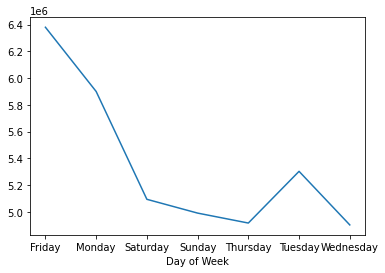

In [ ]:
#OUTRAS ANALISES DES SOBRE AS DATAS
dfdata.groupby('Day of Week').sum()['revenue'].plot()